In [5]:
#Importing the libraries

import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy as scipy

In [6]:
# Importing the dataset
dataset = pd.read_csv('C:/Users/miant/Desktop/Python/insurance_data.csv')
dataset.head()

,age,bmi,charges,gender,region
0,19,28,16885,female,southwest
1,62,26,27809,female,east
2,48,28,23568,male,southwest
3,53,23,23245,female,east
4,20,22,14712,female,northwest


Our variable of interest is "charges"

We will check the normality of the data

<Figure size 432x288 with 0 Axes>

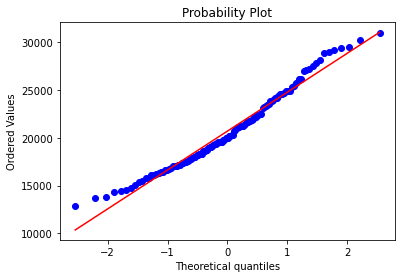

<Figure size 432x288 with 0 Axes>

In [7]:
#QQ-plot

stats.probplot(dataset.charges, plot = plt)
plt.figure()

Now we will perform a Shapiro Wilk test

H0: data comes from a normal distribution // H1: data does not come from a normal distribution

In [8]:
#Shapiro test east
stats.shapiro(dataset.charges[dataset.region=="east"])

ShapiroResult(statistic=0.9700243473052979, pvalue=0.10049082338809967)

In [9]:
#Shapiro test southwest
stats.shapiro(dataset.charges[dataset.region=="southwest"])

ShapiroResult(statistic=0.9592273235321045, pvalue=0.44794216752052307)

In [10]:
#Shapiro test northwest
stats.shapiro(dataset.charges[dataset.region=="northwest"])

ShapiroResult(statistic=0.9469977021217346, pvalue=0.10870692878961563)

Now we will check if we can assume equality of the variances

In [13]:
#we create the objects per region

east = dataset.charges[dataset.region=="east"]

In [14]:
south = dataset.charges[dataset.region=="southwest"]

In [15]:
north = dataset.charges[dataset.region=="northwest"]

In [16]:
#Homogeinity of the variances --> Levene test

#H0: the variances are equal
#H1: the variances are not equal

from scipy.stats import levene

levene(east,south,north,center = 'mean')

LeveneResult(statistic=0.9081132811476632, pvalue=0.40601496082599176)

We set our hypothesis of ANOVA

In [17]:
#H0 : mu east = mu south = mu north
#H1 : there are at least 2 mu that are different oen to another one

#We work with ANOVA One Way --> We analyse the charges based on one category (region)

model = ols('charges~region', data=dataset).fit()
aov = sm.stats.anova_lm(model, type = 2)
print(aov)

             df        sum_sq       mean_sq         F   PR(>F)
region      2.0  4.396982e+07  2.198491e+07  1.334448  0.26715
Residual  121.0  1.993463e+09  1.647490e+07       NaN      NaN


# ANOVA two-ways

In [18]:
# Importing the dataset
dataset2 = pd.read_csv('C:/Users/miant/Desktop/Python/insurance_data_twoways.csv')
dataset2.head()

,age,bmi,charges,gender,region
0,62,26,27809,female,east
1,53,23,23245,female,east
2,28,24,17663,male,east
3,27,25,16578,female,east
4,59,30,30185,male,east


In [19]:
#H0 = means are equal
#H1 = at least one mean is different

model2 = ols('charges~region+gender', data=dataset2).fit()
aov2 = sm.stats.anova_lm(model2, type = 2)
print(aov2)

            df        sum_sq       mean_sq         F    PR(>F)
region     2.0  3.234401e+07  1.617200e+07  0.891993  0.414871
gender     1.0  1.800509e+06  1.800509e+06  0.099310  0.753685
Residual  64.0  1.160333e+09  1.813020e+07       NaN       NaN


Interpretation: we have no reason to believe that the means (charges) are not equal analysing the region where the customers live and their gender. 